In [820]:
%load_ext nb_black
%config IPCompleter.greedy=True
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [821]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

In [822]:
pd.set_option("display.max_columns", 100)

<IPython.core.display.Javascript object>

### Data Dictionary

|S. No|Column|Description|
|-----|------|-----------|
|1|Car_ID|Unique id of each observation (Interger)|
|2|Symboling|Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)|	
|3|carCompany|Name of car company (Categorical)|
|4|fueltype|Car fuel type i.e gas or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|body of car (Categorical)|
|8|drivewheel|type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage. (Numeric)|
|15|enginetype|Type of engine. (Categorical)|
|16|cylindernumber|cylinder placed in the car (Categorical)|
|17|enginesize|Size of car (Numeric)|
|18|fuelsystem|Fuel system of car (Categorical)|
|19|boreratio|Boreratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|compression ratio of car (Numeric)|
|22|horsepower|Horsepower (Numeric)|
|23|peakrpm|car peak rpm (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price(Dependent variable)|Price of car (Numeric)|

### Reading the dataset

In [823]:
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df_copy = car_df.copy()

<IPython.core.display.Javascript object>

In [824]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<IPython.core.display.Javascript object>

### Visualising Numeric Variables

In [825]:
# sns.pairplot(car_df)
# plt.show()

<IPython.core.display.Javascript object>

#### Correlation between numeric values

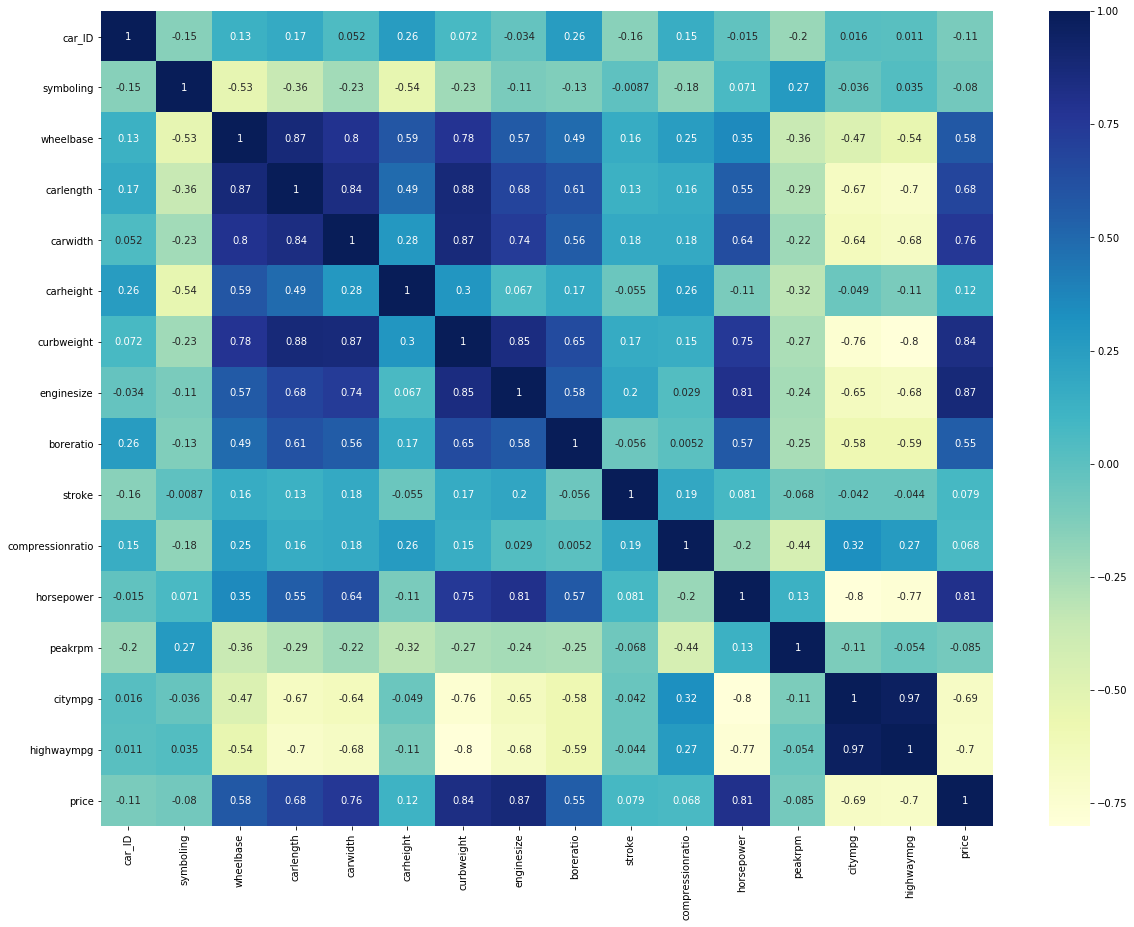

<IPython.core.display.Javascript object>

In [826]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    car_df.corr(), annot=True, cmap="YlGnBu",
)

### Analysing Modifying dataset and introducing derived variables

#### Checking for duplicate rows

In [827]:
car_df[car_df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<IPython.core.display.Javascript object>

##### No duplicate rows are found therefore no rows to remove completely based on duplicates

#### Analysing percentiles

In [828]:
car_df.describe(percentiles=[0.02, 0.05, 0.2, 0.4, 0.6, 0.8, 0.90, 0.95, 0.98])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
2%,5.080000,-1.000000,88.672000,150.000000,63.600000,49.416000,1874.000000,79.080000,2.910000,2.640000,7.000000,56.000000,4154.000000,15.000000,18.080000,5389.800000
5%,11.200000,-1.000000,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,2.970000,2.640000,7.500000,62.000000,4250.000000,16.000000,22.000000,6197.000000
20%,41.800000,0.000000,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000,7385.800000
40%,82.600000,0.000000,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000,9036.600000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
60%,123.400000,1.000000,98.400000,175.600000,66.300000,54.500000,2579.000000,122.000000,3.430000,3.390000,9.240000,102.000000,5200.000000,26.000000,32.000000,12515.600000


<IPython.core.display.Javascript object>

##### We can see outliers in many columns like cuberweight, enginesize, horsepower, peakrpm, citympg, highwaympg, and price after 95%. Threfore wee will keep only data upto 95 percentile 

In [829]:
car_df = car_df[(car_df["price"] < car_df["price"].quantile(0.95))]
car_df.describe(percentiles=[0.02, 0.05, 0.2, 0.4, 0.6, 0.8, 0.90, 0.95, 0.98])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,104.654639,0.819588,98.469072,173.201546,65.727835,53.756701,2503.288660,120.371134,3.311598,3.257990,10.219175,99.190722,5123.195876,25.773196,31.355670,11921.632304
std,59.864695,1.227250,5.485702,11.674375,1.958361,2.423756,472.006278,30.075146,0.265619,0.309583,4.062328,33.944022,473.333557,6.276868,6.527923,5682.728477
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,19.000000,5118.000000
2%,4.860000,-1.000000,88.600000,150.000000,63.572000,49.572000,1868.820000,77.740000,2.910000,2.600800,7.000000,55.860000,4150.000000,16.860000,22.000000,5383.260000
5%,10.650000,-1.000000,93.100000,157.030000,63.600000,49.700000,1896.500000,90.000000,2.952500,2.640000,7.500000,62.000000,4232.500000,17.000000,23.000000,6156.100000
20%,41.600000,0.000000,94.500000,165.300000,63.860000,51.400000,2033.400000,97.000000,3.030000,3.070000,8.500000,69.000000,4800.000000,19.000000,25.000000,7297.400000
40%,86.200000,0.000000,95.900000,170.800000,65.200000,53.020000,2307.000000,108.000000,3.190000,3.230000,9.000000,85.200000,5000.000000,24.000000,29.000000,8917.400000
50%,105.500000,1.000000,96.900000,173.000000,65.450000,54.100000,2403.000000,110.000000,3.310000,3.290000,9.000000,93.000000,5200.000000,25.000000,31.000000,9984.000000
60%,124.800000,1.000000,98.400000,175.560000,66.080000,54.500000,2535.800000,122.000000,3.390000,3.390000,9.280000,101.000000,5200.000000,27.000000,32.000000,11674.200000


<IPython.core.display.Javascript object>

#### Converting all string values to lower case just to avoid any false interpretations

In [830]:
car_df = car_df.apply(
    lambda series: series.astype(str).str.lower()
    if series.dtype == "object"
    else series
)

<IPython.core.display.Javascript object>

In [831]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<IPython.core.display.Javascript object>

#### Seperating car name into company and model

In [832]:
car_df["company"] = car_df.CarName.apply(lambda car_name: car_name.split()[0].lower())
car_df["model"] = car_df.CarName.apply(
    lambda car_name: "".join(car_name.split()[1:]).lower()
)

<IPython.core.display.Javascript object>

In [833]:
car_df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

<IPython.core.display.Javascript object>

#### Replacing incorrect values in company column

In [834]:
car_df["company"] = car_df["company"].apply(
    lambda x: "volkswagen"
    if x in ["vw", "vokswagen"]
    else "toyota"
    if x == "toyouta"
    else x
)
car_df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

<IPython.core.display.Javascript object>

### Generating box plots of each vategorical variable in order to analyse it's relation wiht the price

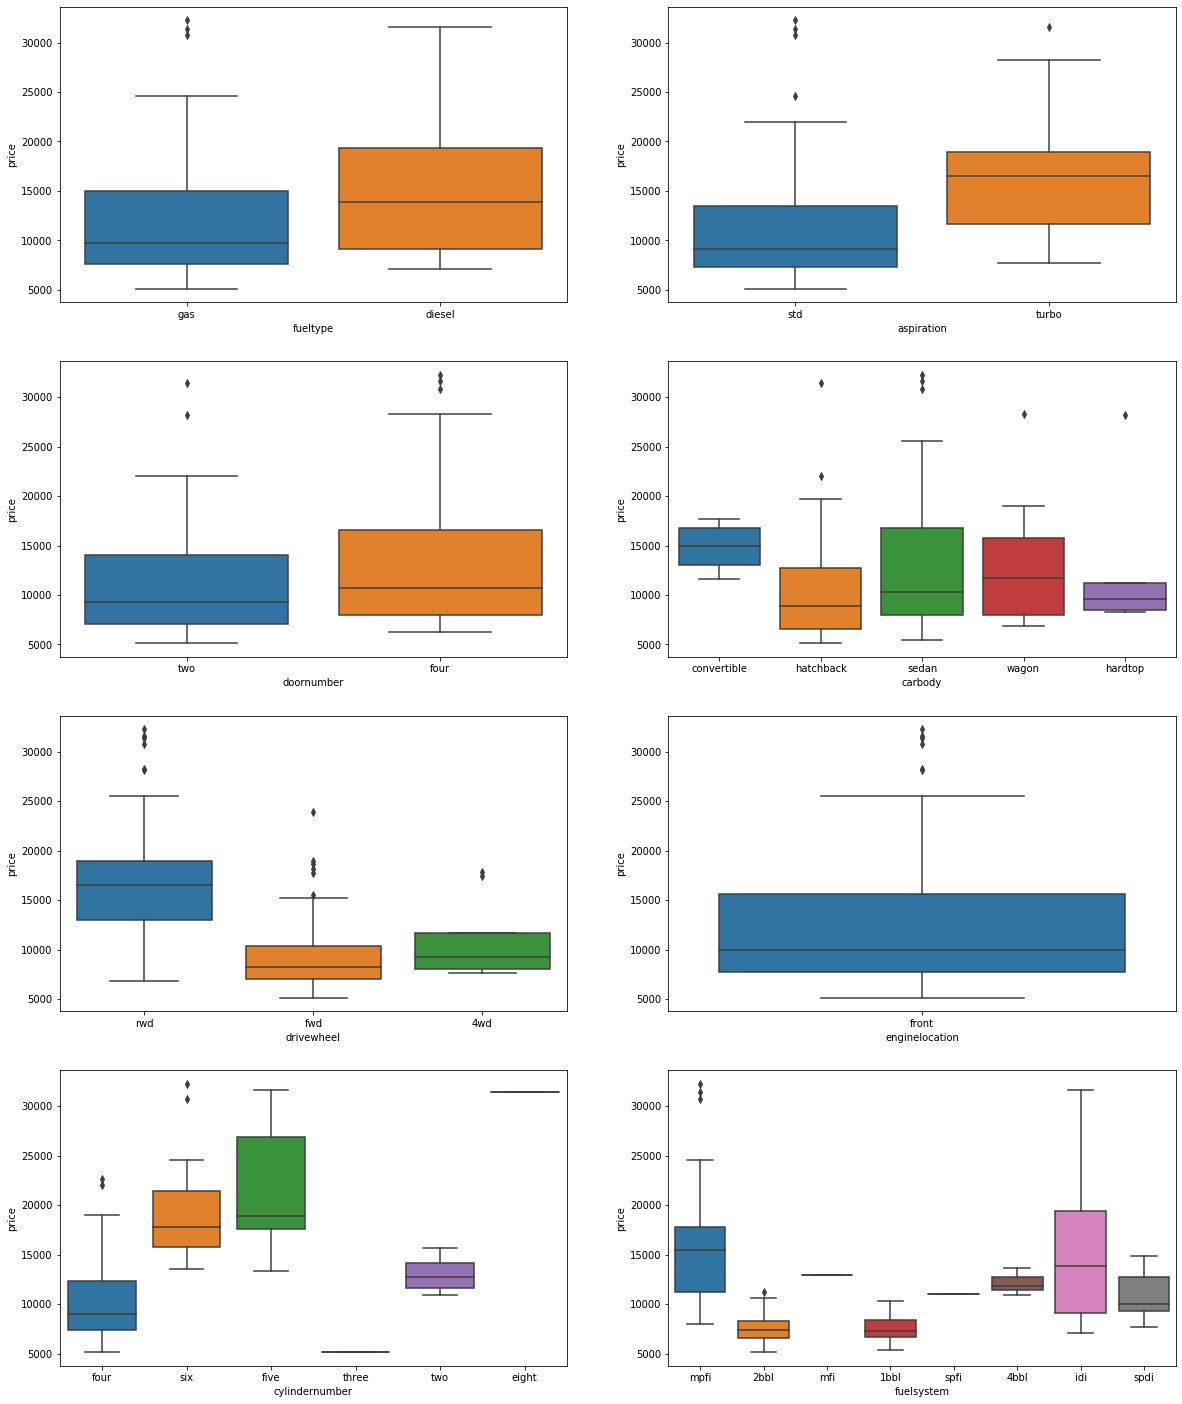

<IPython.core.display.Javascript object>

In [835]:
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 1)
sns.boxplot(x="fueltype", y="price", data=car_df)
plt.subplot(4, 2, 2)
sns.boxplot(x="aspiration", y="price", data=car_df)
plt.subplot(4, 2, 3)
sns.boxplot(x="doornumber", y="price", data=car_df)
plt.subplot(4, 2, 4)
sns.boxplot(x="carbody", y="price", data=car_df)
plt.subplot(4, 2, 5)
sns.boxplot(x="drivewheel", y="price", data=car_df)
plt.subplot(4, 2, 6)
sns.boxplot(x="enginelocation", y="price", data=car_df)
plt.subplot(4, 2, 7)
sns.boxplot(x="cylindernumber", y="price", data=car_df)
plt.subplot(4, 2, 8)
sns.boxplot(x="fuelsystem", y="price", data=car_df)
plt.show()

##### The `price` does rises with the change in `fuel type`, `aspiration`, `car body`, `drive wheel`, `engine location`, `cylinder number` and `fuel system`. Therefore we can convert it to numerical type so that it could be used in building model.

In [836]:
# Lambda for getting dummy variables
def create_dummy_variable(df, column):
    dummy_df = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([car_df, dummy_df], axis=1)
    df = df.drop(column, axis=1)
    return df, dummy_df

<IPython.core.display.Javascript object>

#### Converting fuel type to numeric variable
|Variable|Value|
|--------|-----|
|gas|0|
|diesel|1|

In [837]:
car_df.fueltype = car_df.fueltype.map({"gas": 0, "diesel": 1})
car_df.fueltype.unique()

array([0, 1])

<IPython.core.display.Javascript object>

#### Converting aspiration to numeric variable
|Variable|Value|
|--------|-----|
|std|0|
|turbo|1|

In [838]:
car_df.aspiration = car_df.aspiration.map({"std": 0, "turbo": 1})
car_df.aspiration.unique()

array([0, 1])

<IPython.core.display.Javascript object>

#### Adding car body dummy variables

In [839]:
car_df, dummy_df = create_dummy_variable(car_df, "carbody")
dummy_df.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


<IPython.core.display.Javascript object>

#### Converting engine location to numeric variable
|Variable|Value|
|--------|-----|
|front|0|
|rear|1|

In [840]:
car_df.enginelocation = car_df.enginelocation.map({"front": 0, "rear": 1})
car_df.enginelocation.unique()

array([0])

<IPython.core.display.Javascript object>

#### Adding cylinder number dummy variables

In [841]:
# Check the medians of each category
i = 0
group_by_cylinder_number = (
    car_df.groupby("cylindernumber")
    .median()
    .reset_index()[["cylindernumber", "price"]]
    .sort_values(by="price")
    .reset_index()
    .drop("index", axis=1)
)
group_by_cylinder_number

,cylindernumber,price
0,three,5151.0
1,four,8948.0
2,two,12745.0
3,six,17799.0
4,five,18920.0
5,eight,31400.5


<IPython.core.display.Javascript object>

In [842]:
car_df, dummy_df = create_dummy_variable(car_df, "cylindernumber")
dummy_df.head()

,five,four,six,three,two
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


<IPython.core.display.Javascript object>

#### Adding engine type dummy variables

In [843]:
i = 0
group_by_engine_type = (
    car_df.groupby("enginetype")
    .median()
    .reset_index()[["enginetype", "price"]]
    .sort_values(by="price")
    .reset_index()
    .drop("index", axis=1)
)
group_by_engine_type

,enginetype,price
0,ohcf,7894.0
1,ohc,8948.5
2,rotor,12745.0
3,dohc,15998.0
4,l,16105.0
5,ohcv,16849.5
6,dohcv,31400.5


<IPython.core.display.Javascript object>

In [844]:
car_df, dummy_df = create_dummy_variable(car_df, "enginetype")
dummy_df.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


<IPython.core.display.Javascript object>

#### Adding fuel system dummy variable

In [845]:
i = 0
group_by_fuel_system = (
    car_df.groupby("fuelsystem")
    .median()
    .reset_index()[["fuelsystem", "price"]]
    .sort_values(by="price")
    .reset_index()
    .drop("index", axis=1)
)
group_by_fuel_system

,fuelsystem,price
0,1bbl,7295.0
1,2bbl,7372.0
2,spdi,9959.0
3,spfi,11048.0
4,4bbl,11845.0
5,mfi,12964.0
6,idi,13852.5
7,mpfi,15510.0


<IPython.core.display.Javascript object>

In [846]:
car_df, dummy_df = create_dummy_variable(car_df, "fuelsystem")
dummy_df.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

#### Plotting graphs to analyse correlation between the columns of car_df

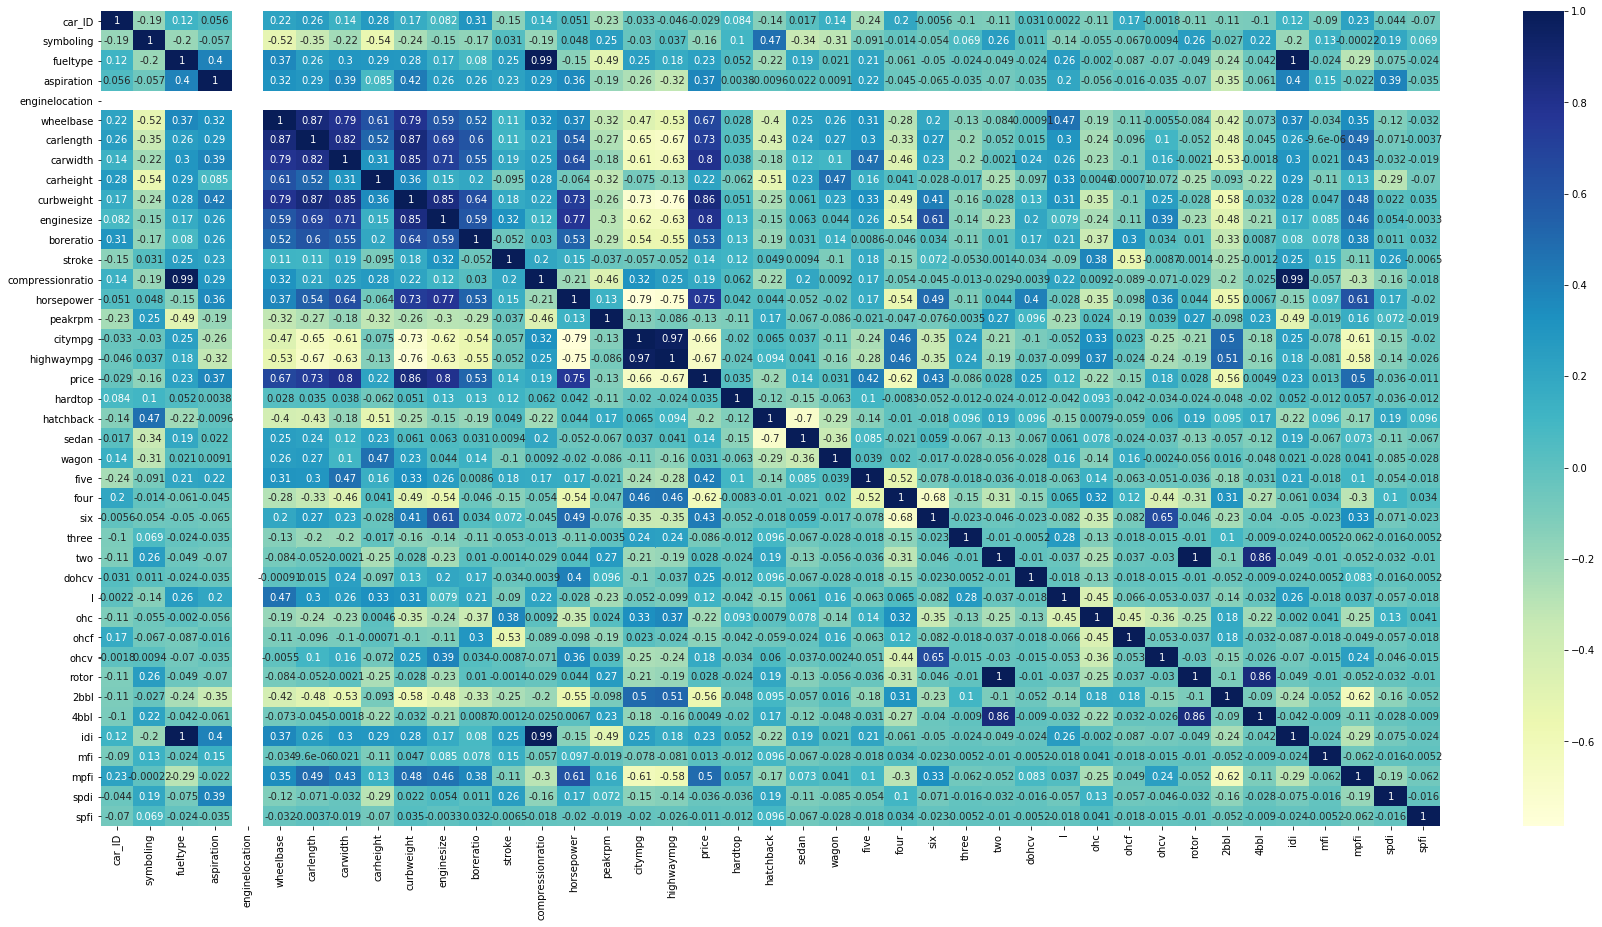

<IPython.core.display.Javascript object>

In [847]:
plt.figure(figsize=(30, 15))
sns.heatmap(
    car_df.corr(), annot=True, cmap="YlGnBu",
)

#### Dropping unnecessary columns

In [848]:
car_df_model = car_df.drop(
    ["car_ID", "CarName", "doornumber", "drivewheel", "company", "model"], axis=1,
)

<IPython.core.display.Javascript object>

### Model Building

#### Splitting model into test data and training data

In [849]:
df_train, df_test = train_test_split(
    car_df_model, train_size=0.7, test_size=0.3, random_state=100
)

<IPython.core.display.Javascript object>

#### Applying min max scaler

In [850]:
scaler = MinMaxScaler()

<IPython.core.display.Javascript object>

In [851]:
num_vars = [
    "wheelbase",
    "carlength",
    "carwidth",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "citympg",
    "highwaympg",
    "price",
]

<IPython.core.display.Javascript object>

In [852]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,five,four,six,three,two,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
30,2,0,0,0,0.000000,0.056911,0.300000,50.8,0.087277,0.157360,0.182540,0.616162,0.1625,0.041667,4800,1.000000,1.000000,0.050162,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
112,0,1,1,0,0.734483,0.741463,0.675000,56.7,0.684251,0.461929,0.809524,0.671717,0.8750,0.195833,4150,0.382353,0.400000,0.434247,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
31,2,0,0,0,0.000000,0.056911,0.300000,50.8,0.128394,0.157360,0.182540,0.616162,0.1375,0.116667,6000,0.470588,0.542857,0.064020,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0.313793,0.465041,0.275000,59.1,0.307215,0.157360,0.293651,0.424242,0.1250,0.058333,4800,0.470588,0.514286,0.066342,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
104,3,0,0,0,0.162069,0.481301,0.633333,49.7,0.614042,0.609137,0.595238,0.545455,0.1250,0.466667,5200,0.117647,0.171429,0.445268,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [853]:
y_train = df_train.pop("price")
X_train = df_train

<IPython.core.display.Javascript object>

#### Taking top 15 attributes in building model

In [854]:
# Running RFE with the output number of the variable equal to 5
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 21),
 ('fueltype', False, 4),
 ('aspiration', False, 13),
 ('enginelocation', False, 24),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 22),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 23),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('hardtop', False, 5),
 ('hatchback', False, 8),
 ('sedan', False, 9),
 ('wagon', False, 6),
 ('five', False, 17),
 ('four', False, 14),
 ('six', False, 18),
 ('three', True, 1),
 ('two', False, 3),
 ('dohcv', True, 1),
 ('l', False, 2),
 ('ohc', False, 11),
 ('ohcf', False, 15),
 ('ohcv', True, 1),
 ('rotor', False, 7),
 ('2bbl', False, 19),
 ('4bbl', False, 16),
 ('idi', True, 1),
 ('mfi', False, 12),
 ('mpfi', False, 20),
 ('spdi', False, 10),
 ('spfi', False, 25)]

<IPython.core.display.Javascript object>

In [855]:
# Function for building model
def get_lm(X_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train).fit()
    return lm, X_train

<IPython.core.display.Javascript object>

In [856]:
# Function for calculating VIF
def get_vif(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [
        variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])
    ]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

<IPython.core.display.Javascript object>

In [857]:
# Training and analysing model
X_train_lm = X_train[col]
lm, X_train = get_lm(X_train_lm)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     57.20
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.69e-47
Time:                        00:30:22   Log-Likelihood:                 162.24
No. Observations:                 135   AIC:                            -292.5
Df Residuals:                     119   BIC:                            -246.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0701      0.072  

<IPython.core.display.Javascript object>

##### `idi` has highest VIF,  hence can be dropped

In [858]:
# Training and analysing model
X_train = X_train.drop(["idi"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     54.40
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.15e-45
Time:                        00:30:22   Log-Likelihood:                 154.74
No. Observations:                 135   AIC:                            -279.5
Df Residuals:                     120   BIC:                            -235.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0158      0.072  

<IPython.core.display.Javascript object>

##### `dohcv` is insignificant in presence of other variables,  hence can be dropped

In [859]:
# Training and analysing model
X_train = X_train.drop(["dohcv"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     58.07
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.28e-45
Time:                        00:30:22   Log-Likelihood:                 153.74
No. Observations:                 135   AIC:                            -279.5
Df Residuals:                     121   BIC:                            -238.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0362      0.071  

<IPython.core.display.Javascript object>

##### `carlength` is insignificant in presence of other variables with high VIF,  hence can be dropped

In [860]:
# Training and analysing model
X_train = X_train.drop(["carlength"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     61.24
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           9.59e-46
Time:                        00:30:22   Log-Likelihood:                 151.71
No. Observations:                 135   AIC:                            -277.4
Df Residuals:                     122   BIC:                            -239.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0038      0.069  

<IPython.core.display.Javascript object>

##### `wheelbase` is insignificant in presence of other variables with high VIF,  hence can be dropped

In [861]:
# Training and analysing model
X_train = X_train.drop(["wheelbase"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     65.90
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.54e-46
Time:                        00:30:22   Log-Likelihood:                 150.45
No. Observations:                 135   AIC:                            -276.9
Df Residuals:                     123   BIC:                            -242.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0112      0.070  

<IPython.core.display.Javascript object>

##### `highwaympg` is insignificant in presence of other variables with high VIF,  hence can be dropped

In [862]:
# Training and analysing model
X_train = X_train.drop(["highwaympg"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     70.64
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.39e-46
Time:                        00:30:22   Log-Likelihood:                 148.49
No. Observations:                 135   AIC:                            -275.0
Df Residuals:                     124   BIC:                            -243.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0447      0.068  

<IPython.core.display.Javascript object>

##### `curbweight` is insignificant in presence of other variables with high VIF,  hence can be dropped

In [863]:
# Training and analysing model
X_train = X_train.drop(["curbweight"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     76.95
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.12e-46
Time:                        00:30:22   Log-Likelihood:                 146.90
No. Observations:                 135   AIC:                            -273.8
Df Residuals:                     125   BIC:                            -244.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0967      0.061  

<IPython.core.display.Javascript object>

### Residual Analysis of the train data

In [864]:
y_train_pred = lm.predict(X_train)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Errors')

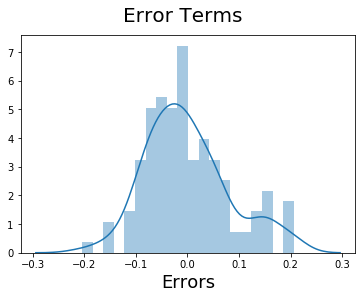

<IPython.core.display.Javascript object>

In [865]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle("Error Terms", fontsize=20)  # Plot heading
plt.xlabel("Errors", fontsize=18)

##### The residuals are following the normally distributed with a mean 0. All good!

### Making Predictions

In [866]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

<IPython.core.display.Javascript object>

In [867]:
y_test = df_test.pop("price")
X_test = df_test

<IPython.core.display.Javascript object>

In [868]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.drop("const", axis=1).columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

<IPython.core.display.Javascript object>

In [869]:
# Making predictions
y_pred = lm.predict(X_test_new)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'y_pred')

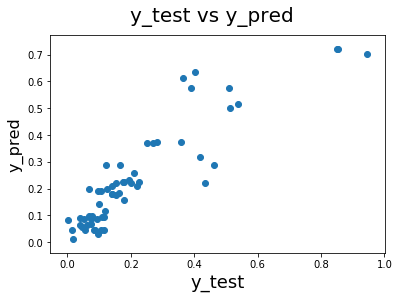

<IPython.core.display.Javascript object>

In [870]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred", fontsize=20)  # Plot heading
plt.xlabel("y_test", fontsize=18)  # X-label
plt.ylabel("y_pred", fontsize=16)  # Y-label

In [871]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.0921920449043019

<IPython.core.display.Javascript object>

In [872]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7984538814253732

<IPython.core.display.Javascript object>

##### Since difference between $R^{2}$ of training dataset and test dataset is around 5. We will rebuild the model by dropping one more column

In [873]:
# Training and analysing model
X_train = X_train.drop(["three"], axis=1)
lm, X_train = get_lm(X_train)
print(lm.summary())
vif = get_vif(X_train)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     79.69
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.36e-45
Time:                        00:30:22   Log-Likelihood:                 141.75
No. Observations:                 135   AIC:                            -265.5
Df Residuals:                     126   BIC:                            -239.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0790      0.063  

<IPython.core.display.Javascript object>

### Residual Analysis of the train data

In [874]:
y_train_pred = lm.predict(X_train)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Errors')

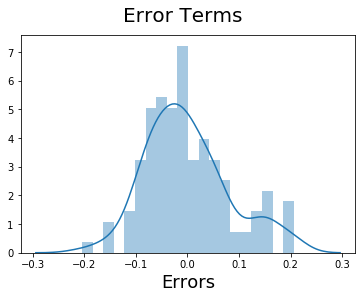

<IPython.core.display.Javascript object>

In [875]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle("Error Terms", fontsize=20)  # Plot heading
plt.xlabel("Errors", fontsize=18)

In [876]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.drop("const", axis=1).columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

<IPython.core.display.Javascript object>

In [877]:
# Making predictions
y_pred = lm.predict(X_test_new)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'y_pred')

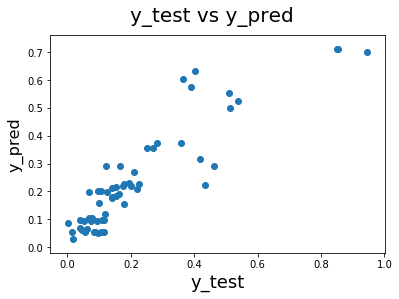

<IPython.core.display.Javascript object>

In [878]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred", fontsize=20)  # Plot heading
plt.xlabel("y_test", fontsize=18)  # X-label
plt.ylabel("y_pred", fontsize=16)  # Y-label

In [879]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09186715354895007

<IPython.core.display.Javascript object>

In [880]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7998719042614001

<IPython.core.display.Javascript object>

##### Since difference between $R^{2}$ of training dataset and test dataset is around 2.35. can use this model for making predictions.

#### And the variables we have used for prediction are:

In [895]:
pd.DataFrame(X_train.columns.drop("const"), columns=["Columns"])

,Columns
0,carwidth
1,enginesize
2,boreratio
3,stroke
4,compressionratio
5,horsepower
6,ohcv


<IPython.core.display.Javascript object>